<a href="https://colab.research.google.com/github/ShounakD1991/Hobby_Project_1/blob/main/Emergency_(911)_Calls_Fire%2C_Traffic%2C_EMS_for_Montgomery_County%2C_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
### **Project on emergency calls dataset - Overview**
---
Dataset contains the following columns:

lat : Latitude

lng: Longitude

desc: Description of the Emergency Call

zip: Zipcode

title: Title

timeStamp: YYYY-MM-DD HH:MM:SS

twp: Township

addr: Address

e: always 1



---
### Importing Libraries
---





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



---
### Importing Dataset
---





In [2]:
df=pd.read_csv("/content/drive/MyDrive/Data Science and Machine Learning using Python - A Bootcamp/Course_Material/S_9_Cap_Proj_DA_DV/Emergency_Calls.csv")



---
### **Total Number of columns and enteries**
---





In [3]:
df.shape

(99492, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB




---
### **First 5 observations of DataSet**
---





In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1




---
### **Unique township and title details**
---





In [6]:
print(f"There are total {df['title'].nunique()} unique title")

There are total 110 unique title


In [7]:
print(f"There are total {df['twp'].nunique()} unique townships")

There are total 68 unique townships




---
### **Calls from top 2 townships**
---





In [8]:
print(f"Top 2 townships making the maximum call are\n{df['twp'].value_counts().head(2)}")

Top 2 townships making the maximum call are
LOWER MERION    8443
ABINGTON        5977
Name: twp, dtype: int64




---
### **Top 5 townships for 911 call**
---





In [9]:
print(f"Top 5 townships making 911 calls are mentioned below\n{df['twp'].value_counts().head()}")

Top 5 townships making 911 calls are mentioned below
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64




---
### **Unique titles and their codes**
---





In [10]:
print(f"There are total {df['title'].nunique()} unique title")
print(f"\n\nThe top codes are as follows\n\n{df['title'].unique()}")

There are total 110 unique title


The top codes are as follows

['EMS: BACK PAINS/INJURY' 'EMS: DIABETIC EMERGENCY' 'Fire: GAS-ODOR/LEAK'
 'EMS: CARDIAC EMERGENCY' 'EMS: DIZZINESS' 'EMS: HEAD INJURY'
 'EMS: NAUSEA/VOMITING' 'EMS: RESPIRATORY EMERGENCY'
 'EMS: SYNCOPAL EPISODE' 'Traffic: VEHICLE ACCIDENT -'
 'EMS: VEHICLE ACCIDENT' 'Traffic: DISABLED VEHICLE -'
 'Fire: APPLIANCE FIRE' 'EMS: GENERAL WEAKNESS'
 'Fire: CARBON MONOXIDE DETECTOR' 'EMS: UNKNOWN MEDICAL EMERGENCY'
 'EMS: UNRESPONSIVE SUBJECT' 'Fire: VEHICLE ACCIDENT'
 'EMS: ALTERED MENTAL STATUS' 'Fire: FIRE ALARM' 'EMS: CVA/STROKE'
 'Traffic: ROAD OBSTRUCTION -' 'EMS: SUBJECT IN PAIN' 'EMS: HEMORRHAGING'
 'EMS: FALL VICTIM' 'EMS: ASSAULT VICTIM' 'EMS: SEIZURES'
 'EMS: MEDICAL ALERT ALARM' 'EMS: ABDOMINAL PAINS' 'Fire: PUMP DETAIL'
 'Fire: FIRE INVESTIGATION' 'EMS: OVERDOSE' 'EMS: MATERNITY'
 'EMS: UNCONSCIOUS SUBJECT' 'EMS: CHOKING' 'EMS: LACERATIONS'
 'Fire: TRASH/DUMPSTER FIRE' 'Fire: UNKNOWN TYPE FIRE'
 'Fire: BUILDING FI

In [11]:
df['Reason']=df['title'].apply(lambda x:x.split(":")[0])
df['Code']=df['title'].apply(lambda x:x.split(":")[1])



---
### **Dataset after addition of columns**
---





In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS




---
### **Unique Reasons for Call**
---





In [13]:
print(f"There are {df['Reason'].nunique()} for call and they are\n\n{df['Reason'].unique()}")

There are 3 for call and they are

['EMS' 'Fire' 'Traffic']




---
### **Common Reason for Call**
---





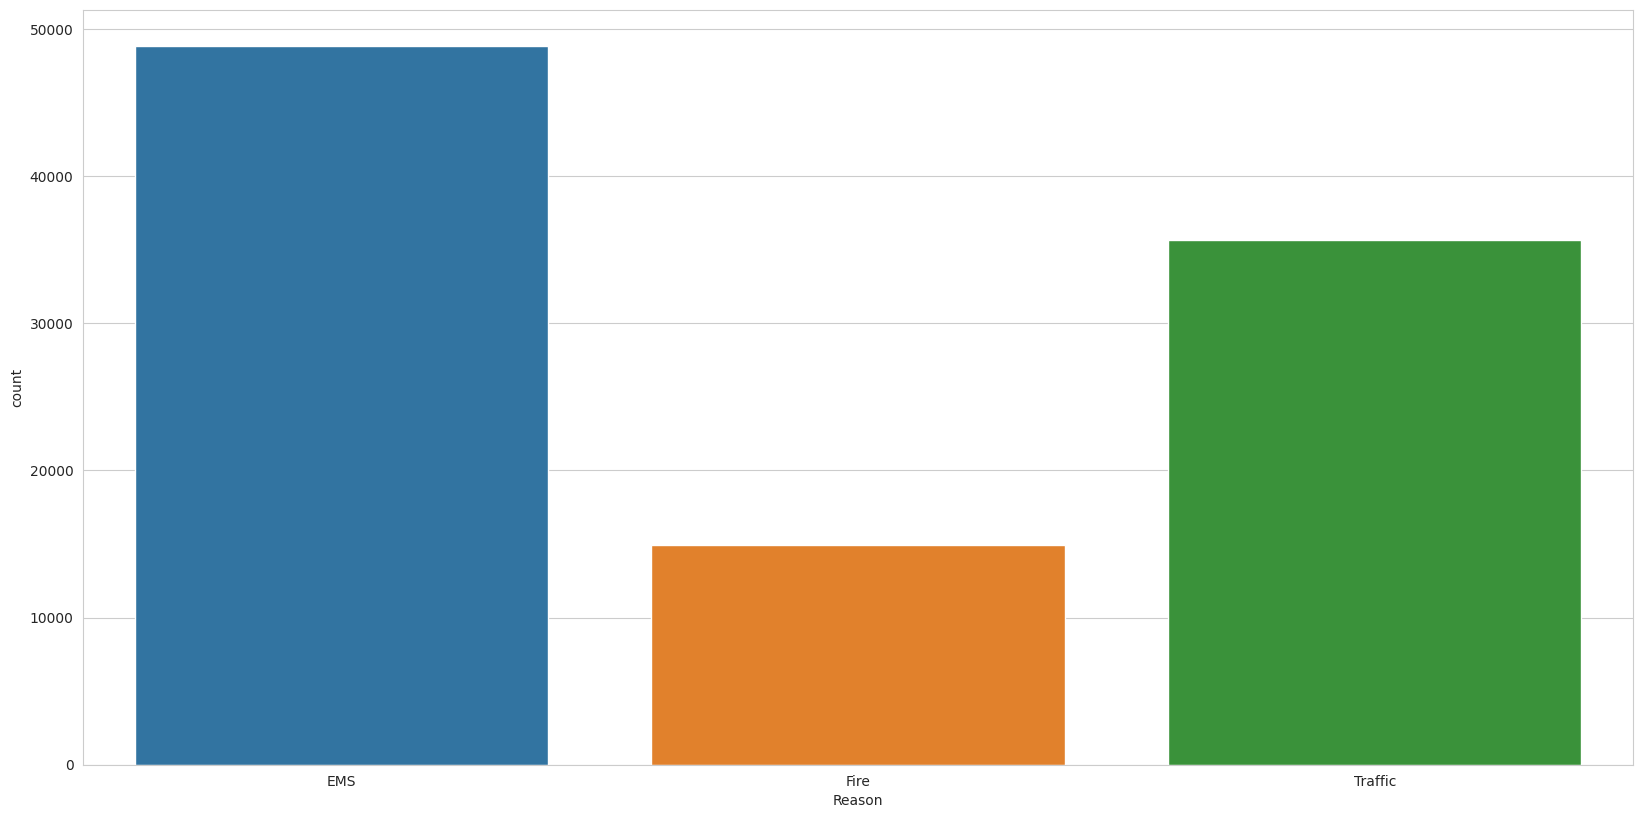

In [14]:
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(x=df['Reason'])
plt.show()



---
### **Modification of datatype of a datetime column from string to datetime**
---





In [15]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS




---
### **Creating year, hour, month, day, weekday columns**
---





In [16]:
df['Date']=df['timeStamp'].apply(lambda time:time.date())
df['Year']=df['timeStamp'].apply(lambda time:time.year)
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['week_day'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,Date,Year,Hour,month,week_day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,2015,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,2015,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,2015,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,2015,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015-12-10,2015,17,12,3


In [17]:
df['month']=df['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df['week_day']=df['week_day'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,Date,Year,Hour,month,week_day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,2015,17,Dec,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,2015,17,Dec,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,2015,17,Dec,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,2015,17,Dec,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015-12-10,2015,17,Dec,Thu




---
### **Study about date time and reasons**
---





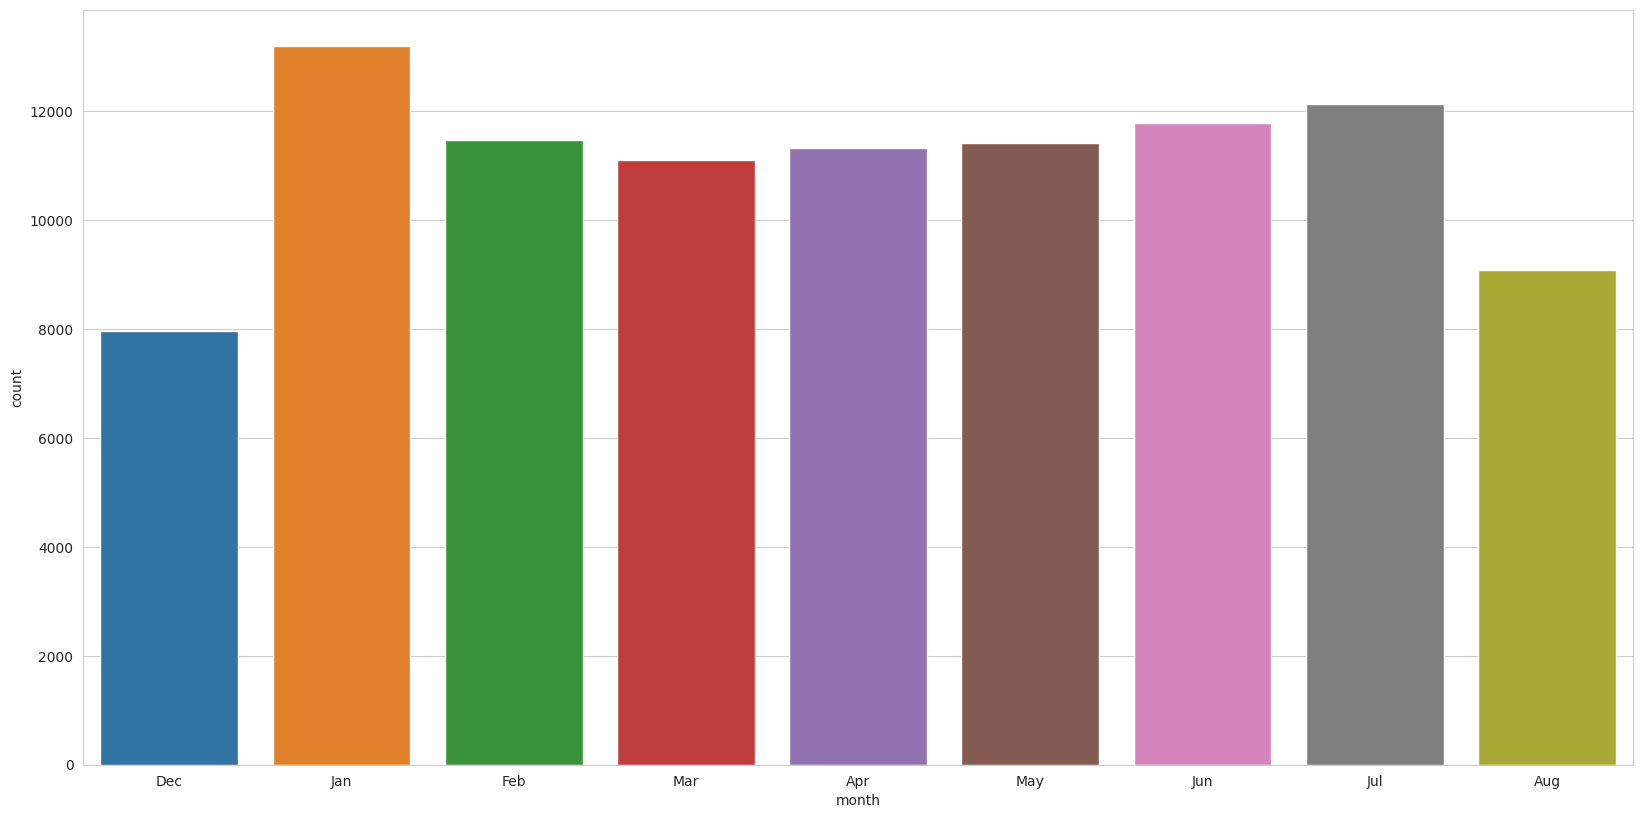

In [18]:
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(x=df['month'])
plt.show()

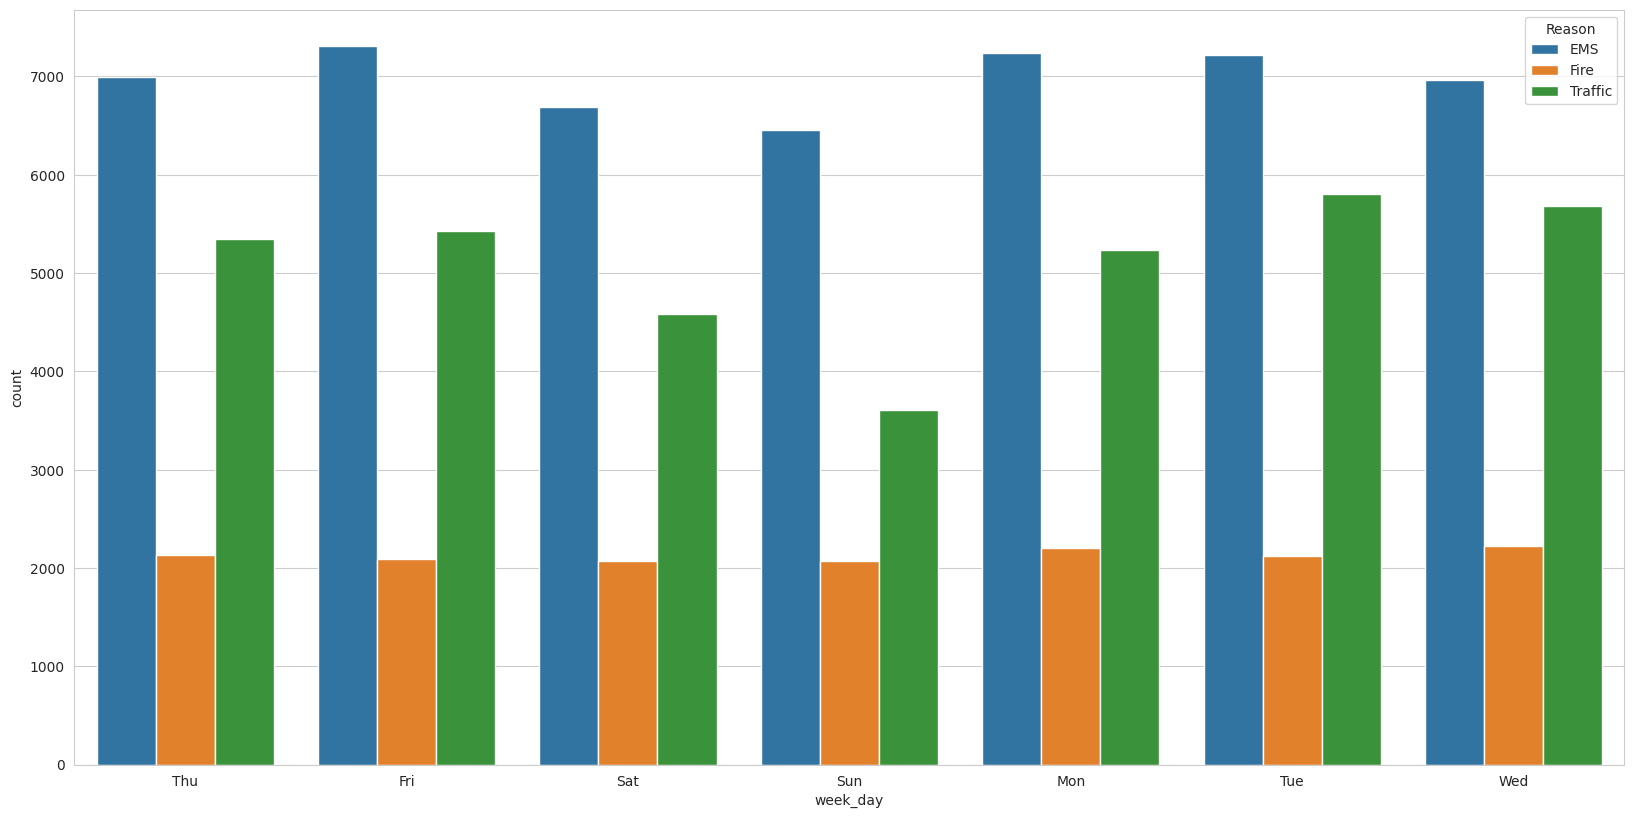

In [19]:
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(data=df,x='week_day',hue='Reason')
plt.show()

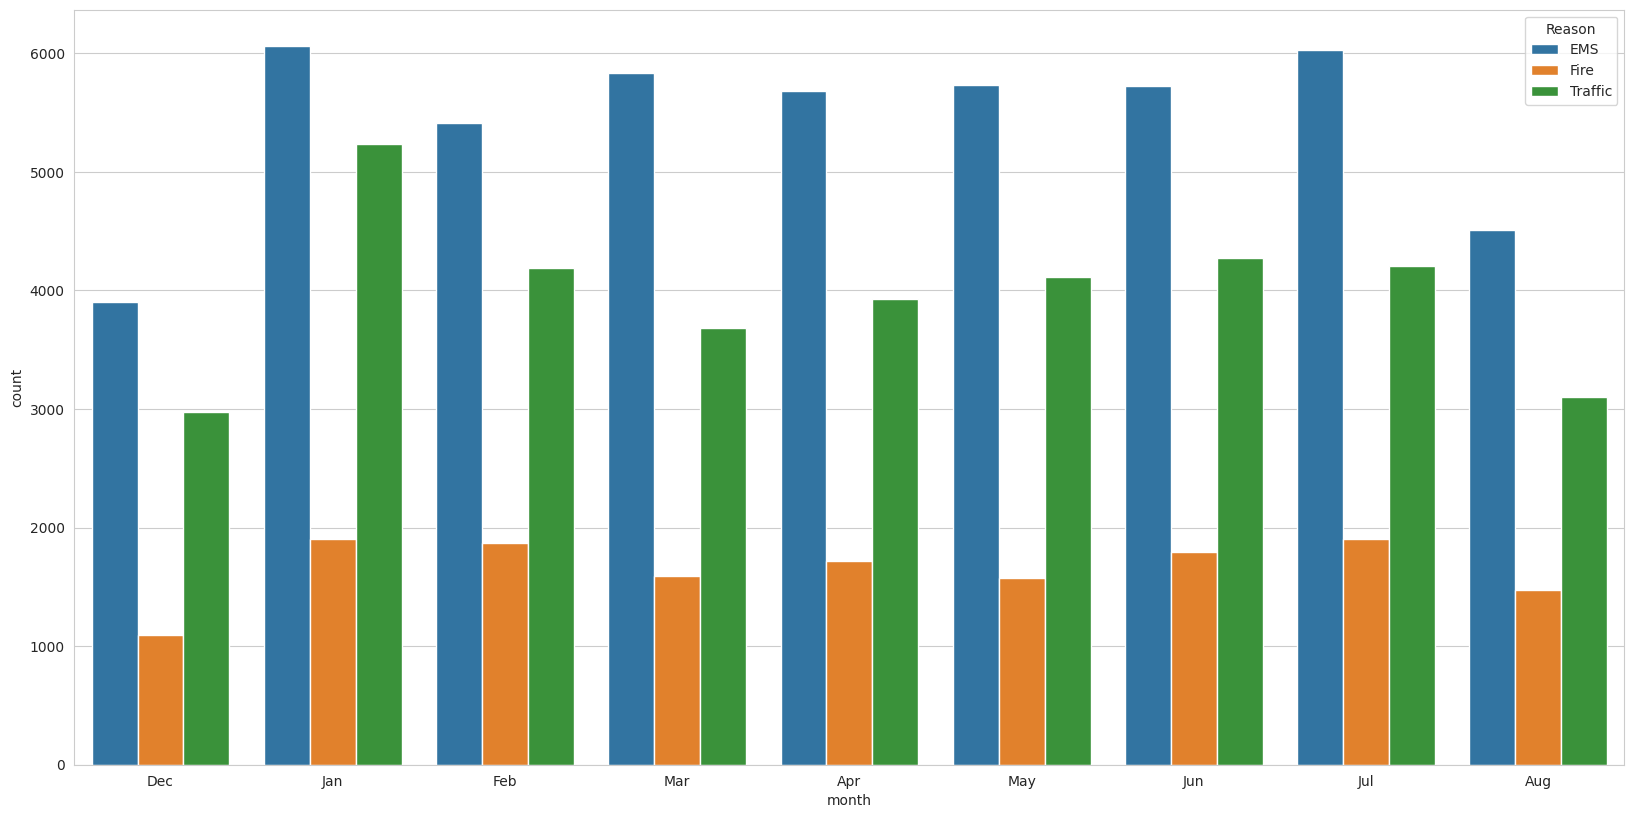

In [20]:
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(data=df,x='month',hue='Reason')
plt.show()



---
### **Identifying Null Values**
---





In [21]:
df.isnull().sum()/len(df)*100

lat           0.000000
lng           0.000000
desc          0.000000
zip          12.920637
title         0.000000
timeStamp     0.000000
twp           0.043220
addr          0.521650
e             0.000000
Reason        0.000000
Code          0.000000
Date          0.000000
Year          0.000000
Hour          0.000000
month         0.000000
week_day      0.000000
dtype: float64



---
### **Identifying missing values by month**
---





In [22]:
pt=df.groupby('month').count()
pt.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,Date,Year,Hour,week_day
0,Apr,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
1,Aug,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,9078
2,Dec,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969
3,Feb,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
4,Jan,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
5,Jul,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,12137
6,Jun,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,11786
7,Mar,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
8,May,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423


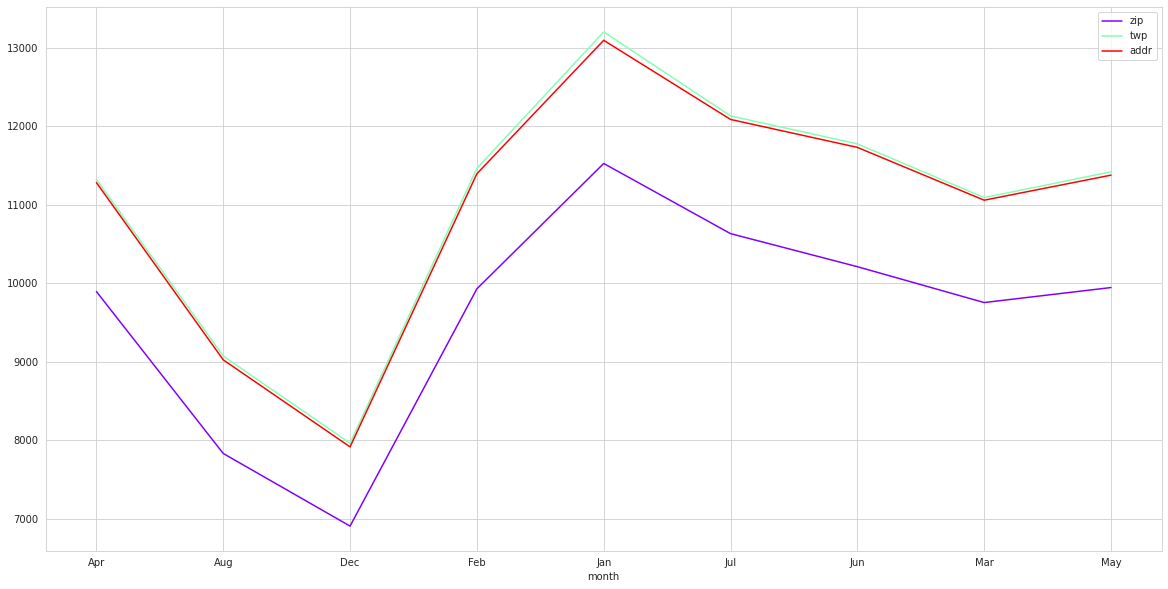

In [23]:
pt[['zip','twp','addr']].plot(kind='line',figsize=(20,10),legend='True',colormap='rainbow')
plt.show()

---
**Let's see the variations in the calls flux per day for three reasons (Traffic, Fire, EMS) in the dataset.**
---
The emergency department needs to know the flux of calls per day for each reason mentioned in the dataset so that they can take necessary steps to improve the service.




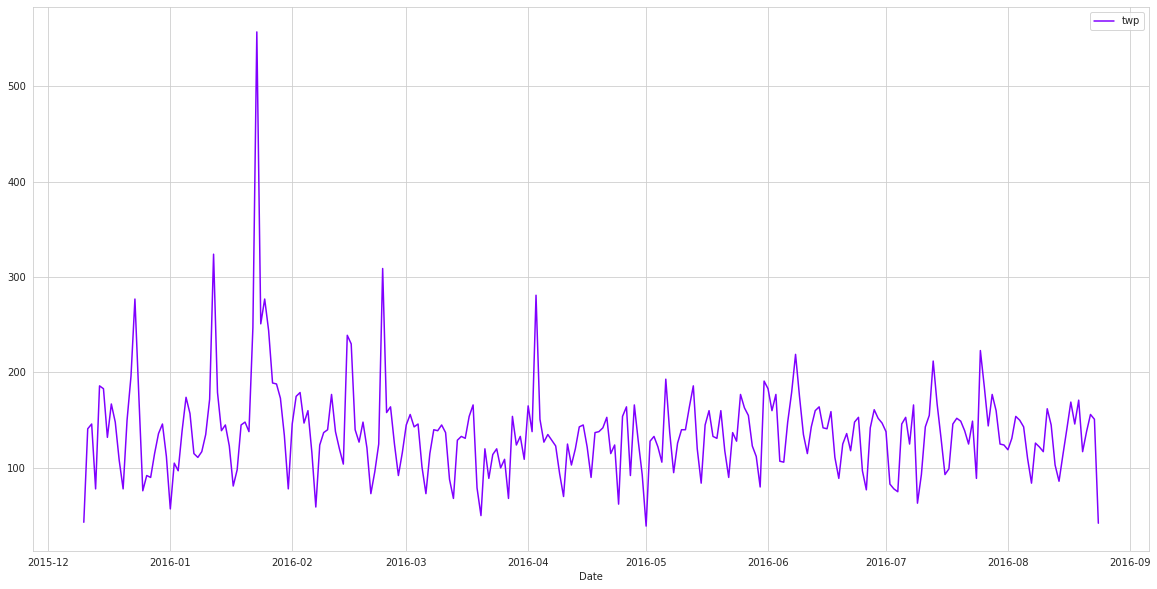

In [24]:
n_calls_byDate_Traffic = df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(kind='line',figsize=(20,10),legend='True',colormap='rainbow')

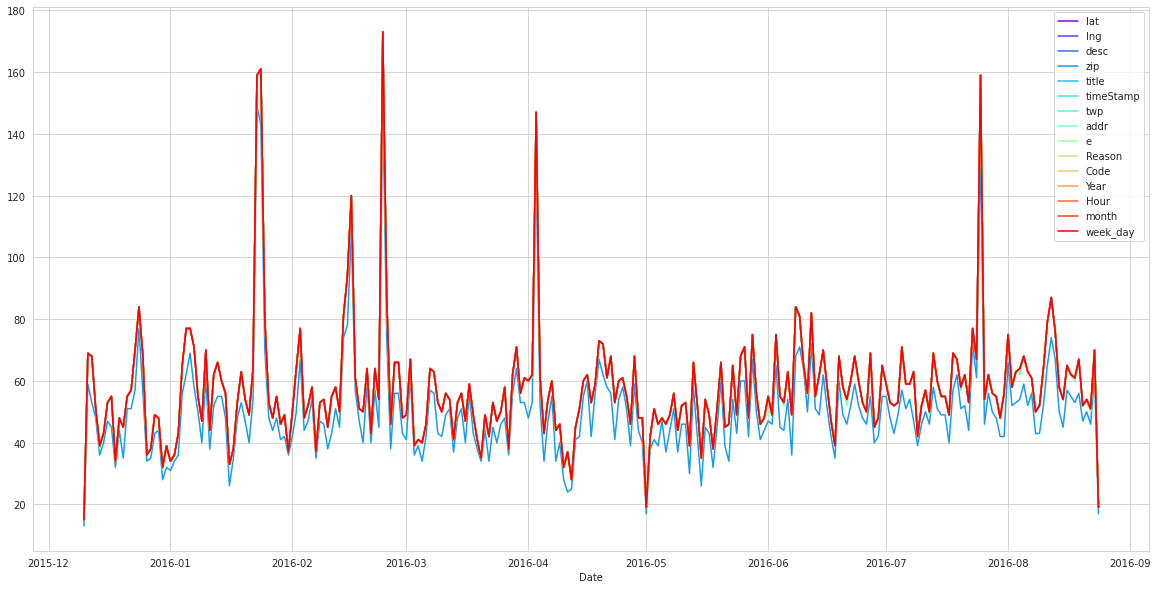

In [25]:
n_calls_byData_Fire = df[df['Reason']=='Fire'].groupby('Date').count().plot(kind='line',figsize=(20,10),legend='True',colormap='rainbow')

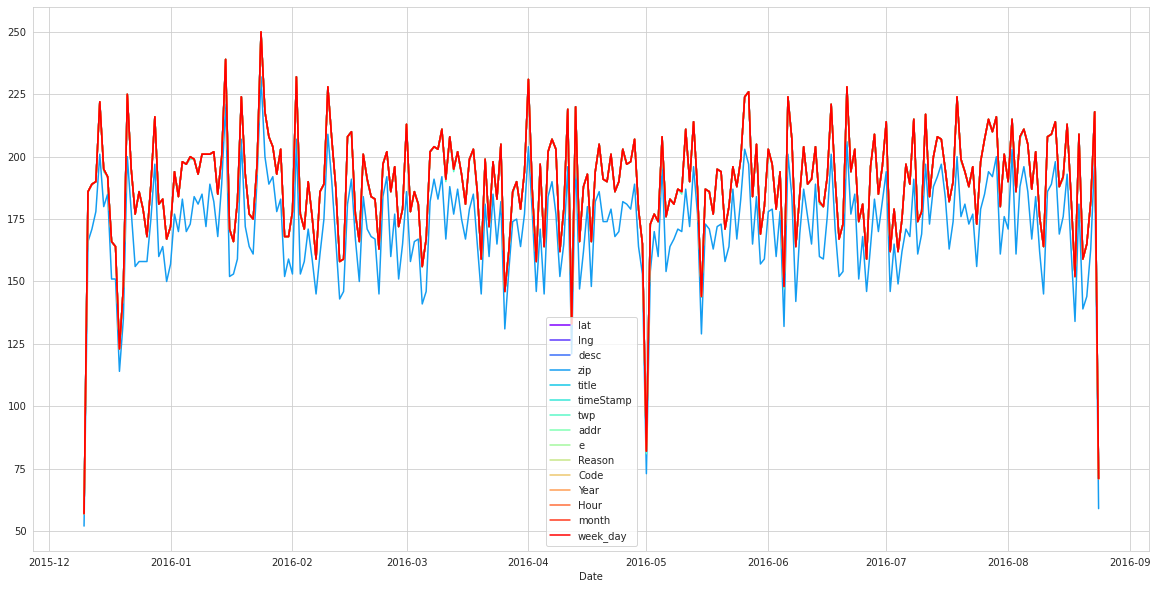

In [26]:
n_calls_byDate_EMS = df[df['Reason']=='EMS'].groupby('Date').count().plot(kind='line',figsize=(20,10),legend='True',colormap='rainbow')



---
### **Number of calls per day per hour**
---





In [27]:
by_dayhr=df.groupby(by=['week_day','Hour']).count()['Reason'].unstack()
by_dayhr.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
week_day,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354




---
### **Time when the emergency crew gets maximum number of calls**
---





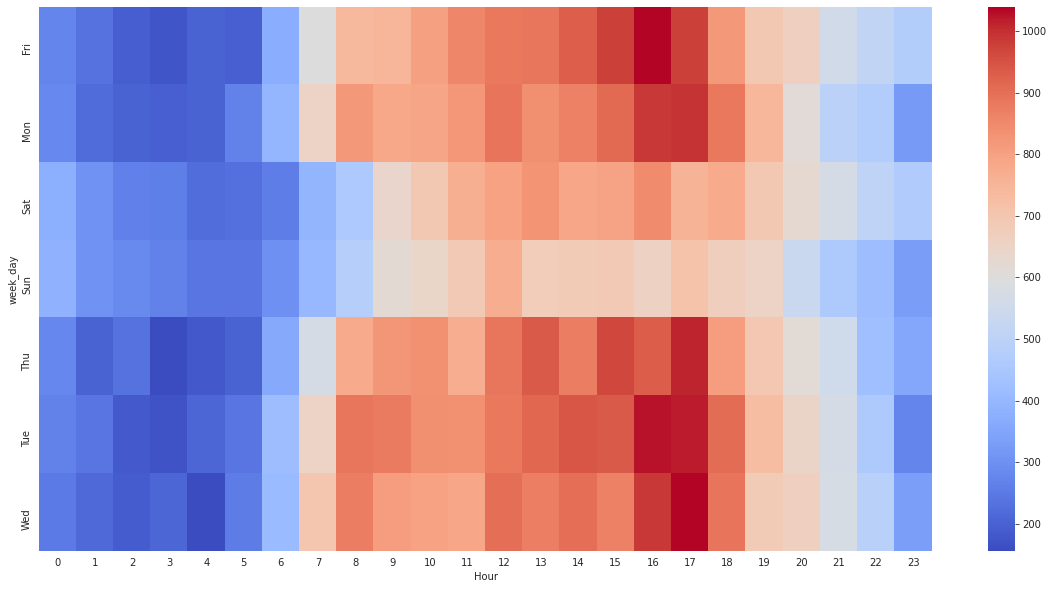

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(by_dayhr,cmap='coolwarm')
plt.show()

<Figure size 1440x720 with 0 Axes>

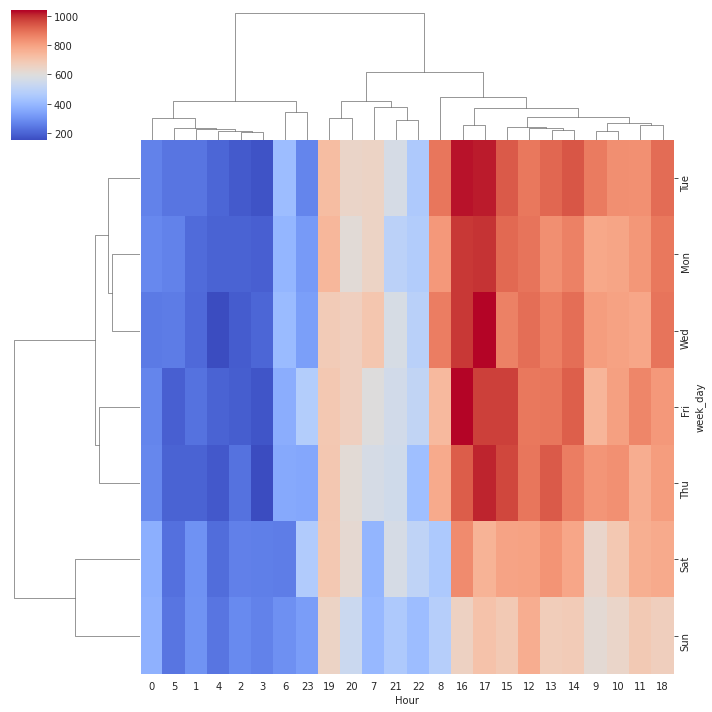

In [29]:
plt.figure(figsize=(20,10))
sns.clustermap(by_dayhr,cmap='coolwarm')
plt.show()

In [30]:
by_dayMonth = df.groupby(by=['week_day','month']).count()['Reason'].unstack()
by_dayMonth.head()

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May
week_day,,,,,,,,,
Fri,1958,1310,1065,1581,1970,2045,1649,1525,1730
Mon,1598,1511,1257,1964,1727,1692,1617,1535,1779
Sat,1734,1099,978,1441,2291,1695,1388,1266,1444
Sun,1488,1021,907,1229,1960,1672,1333,1102,1424
Thu,1601,1230,1266,1596,1584,1646,2065,1900,1590


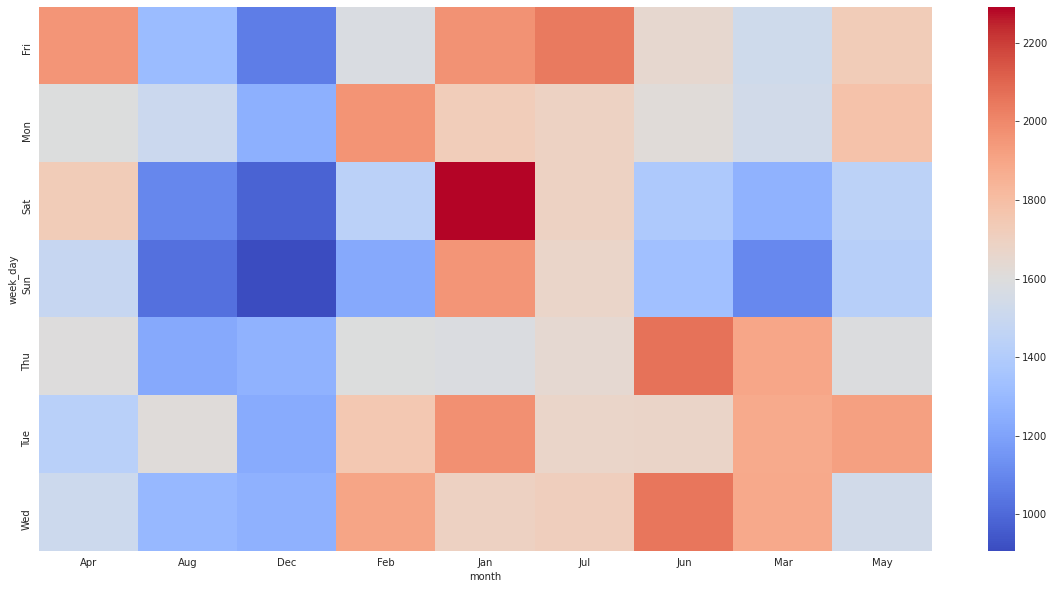

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(by_dayMonth,cmap='coolwarm')
plt.show()

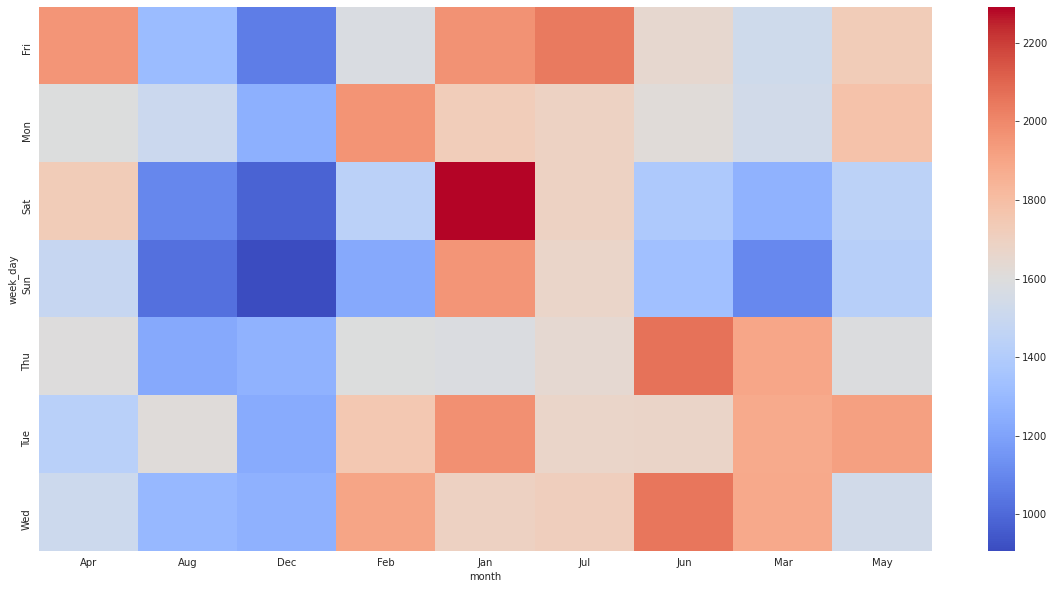

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(by_dayMonth,cmap='coolwarm')
plt.show()